In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinear
from sklearn.linear_model import LogisticRegression as SklearnLogistic
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, roc_curve)
from IPython.display import HTML, Markdown
import base64
from ml_from_scratch.linear_regression import LinearRegression
from ml_from_scratch.logistic_regression import LogisticRegression as MyLogistic

Линейная регрессия

In [41]:
X, y = make_regression(
    n_samples=1000,
    n_features=5,
    noise=0.1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
my_model_grad = LinearRegression(
    learning_rate=0.01,
    max_iter=1000,
    method='gradient',
    verbose=False
)
my_model_grad.X_test = X_test
my_model_grad.y_test = y_test
my_model_grad.fit(X_train, y_train)

my_model_analytic = LinearRegression(
    method='analytic',
    verbose=False
)
my_model_analytic.X_test = X_test
my_model_analytic.y_test = y_test
my_model_analytic.fit(X_train, y_train)

sklearn_model = SklearnLinear()
sklearn_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_grad = my_model_grad.predict(X_test)
y_pred_analytic = my_model_analytic.predict(X_test)
y_pred_sk = sklearn_model.predict(X_test)

In [ ]:
my_metrics_grad = my_model_grad.get_additional_metrics(X_test, y_test)
my_r2_grad = my_model_grad.score(X_test, y_test)

my_metrics_analytic = my_model_analytic.get_additional_metrics(X_test, y_test)
my_r2_analytic = my_model_analytic.score(X_test, y_test)

sk_rmse = mean_squared_error(y_test, y_pred_sk)
sk_mae = mean_absolute_error(y_test, y_pred_sk)
sk_r2 = r2_score(y_test, y_pred_sk)

metrics_comparison = {
    'RMSE': (my_metrics_grad['rmse'], my_metrics_analytic['rmse'], sk_rmse),
    'MAE': (my_metrics_grad['mae'], my_metrics_analytic['mae'], sk_mae),
    'R²': (my_r2_grad, my_r2_analytic, sk_r2)
}

print("СРАВНЕНИЕ МЕТРИК")
print(f"{'Метрика':<8} {'Gradient':<18} {'Analytic':<15} {'sklearn':<12} {'Разница (max)'}")
print("-" * 70)
for name, (grad, analytic, sk) in metrics_comparison.items():
    max_diff = max(abs(grad - sk), abs(analytic - sk))
    print(f"{name:<8} {grad:<18.6f} {analytic:<15.6f} {sk:<12.6f} {max_diff:.2e}")

СРАВНЕНИЕ МЕТРИК (Градиент / Аналитический / sklearn)
Метрика  Gradient           Analytic        sklearn      Разница (max)
----------------------------------------------------------------------
RMSE     0.019386           0.002688        0.011091     8.40e-03
MAE      0.124243           0.085351        0.085351     3.89e-02
R²       0.999993           0.999997        0.999997     3.62e-06


In [ ]:
print("СРАВНЕНИЕ КОЭФФИЦИЕНТОВ (первые 5)")
print(f"Градиентный:     {np.round(my_model_grad.coef_[:5], 6)}")
print(f"Аналитический:   {np.round(my_model_analytic.coef_[:5], 6)}")
print(f"sklearn:         {np.round(sklearn_model.coef_[:5], 6)}")
print(f"Свободный член: градиент = {my_model_grad.intercept_:.6f}, аналитический = {my_model_analytic.intercept_:.6f}, sklearn = {sklearn_model.intercept_:.6f}")

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ (первые 5)
Градиентный:     [28.534235 46.020337 16.832043 24.717794 18.968913]
Аналитический:   [28.620852 46.069535 16.82201  24.744165 18.995134]
sklearn:         [28.620852 46.069535 16.82201  24.744165 18.995134]
Свободный член: градиент = 0.008429, аналитический = -0.006735, sklearn = -0.006735


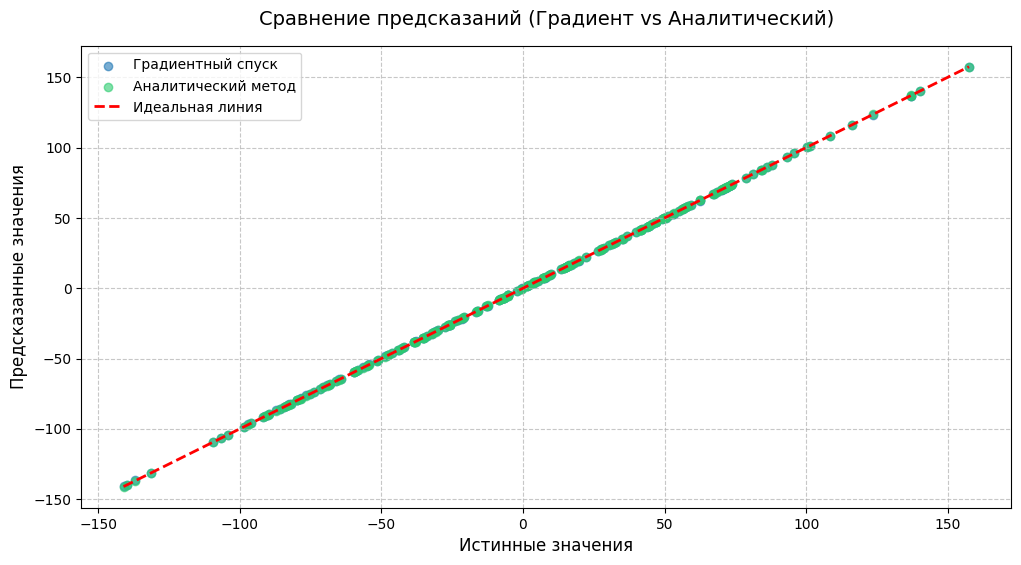

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_grad, color='#1f77b4', alpha=0.6, label='Градиентный спуск')
plt.scatter(y_test, y_pred_analytic, color='#2ecc71', alpha=0.6, label='Аналитический метод')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

plt.xlabel('Истинные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение предсказаний (Градиент vs Аналитический)', fontsize=14, pad=15)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Логистическая регрессия

In [22]:
X_cls, y_cls = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [25]:
my_log = LogisticRegression(learning_rate=0.1, max_iter=1000, l2=0.01, verbose=False)
my_log.X_test, my_log.y_test = X_test_cls, y_test_cls
my_log.fit(X_train_cls, y_train_cls)
None

In [27]:
sklearn_log = SklearnLogistic(max_iter=1000, C=1/0.01, solver='lbfgs')
sklearn_log.fit(X_train_cls, y_train_cls)

LogisticRegression(C=100.0, max_iter=1000)

In [28]:
y_pred_my = my_log.predict(X_test)
y_proba_my = my_log.predict_proba(X_test)[:, 1]

y_pred_sk = sklearn_log.predict(X_test)
y_proba_sk = sklearn_log.predict_proba(X_test)[:, 1]

In [31]:
my_metrics = my_log.get_additional_metrics(X_test, y_test)
my_accuracy = my_log.score(X_test, y_test)

sk_accuracy = accuracy_score(y_test, y_pred_sk)
sk_precision = precision_score(y_test, y_pred_sk)
sk_recall = recall_score(y_test, y_pred_sk)
sk_f1 = f1_score(y_test, y_pred_sk)
sk_roc_auc = roc_auc_score(y_test, y_proba_sk)

metrics_comparison = {
    'accuracy':  (my_accuracy, sk_accuracy),
    'precision': (my_metrics['precision'], sk_precision),
    'recall':    (my_metrics['recall'], sk_recall),
    'f1':        (my_metrics['f1'], sk_f1),
    'roc_auc':   (my_metrics['roc_auc'], sk_roc_auc)
}

print("СРАВНЕНИЕ ВСЕХ МЕТРИК")
print(f"{'Метрика':<12} {'ml_from_scratch':<18} {'sklearn':<15} {'Разница':<10}")
print("-" * 60)
for name, (ours, sk) in metrics_comparison.items():
    diff = abs(ours - sk)
    print(f"{name:<12} {ours:<18.6f} {sk:<15.6f} {diff:.2e}")

СРАВНЕНИЕ ВСЕХ МЕТРИК
Метрика      ml_from_scratch    sklearn         Разница   
------------------------------------------------------------
accuracy     0.595000           0.600000        5.00e-03
precision    0.567010           0.577778        1.08e-02
recall       0.585106           0.553191        3.19e-02
f1           0.575916           0.565217        1.07e-02
roc_auc      0.602369           0.606985        4.62e-03


In [32]:
cm_my = confusion_matrix(y_test, y_pred_my)
cm_sk = confusion_matrix(y_test, y_pred_sk)

print("Confusion Matrix:")
print(f"Наша:\n{cm_my}")
print(f"sklearn:\n{cm_sk}")

Confusion Matrix:
Наша:
[[64 42]
 [39 55]]
sklearn:
[[68 38]
 [42 52]]


In [37]:
print("Коэффициенты (первые 5):")
print(f"Наши:     {np.round(my_log.coef_[:5], 6)}")
print(f"sklearn:  {np.round(sklearn_log.coef_[0][:5], 6)}")
print(f"Intercept: наш = {my_log.intercept_:.6f}, sklearn = {sklearn_log.intercept_[0]:.6f}")

Коэффициенты (первые 5):
Наши:     [-0.434492  0.068608  0.098111  0.177895  0.023133]
sklearn:  [-0.517749  0.04146   0.112465  0.189239  0.056953]
Intercept: наш = -0.157696, sklearn = -0.500962


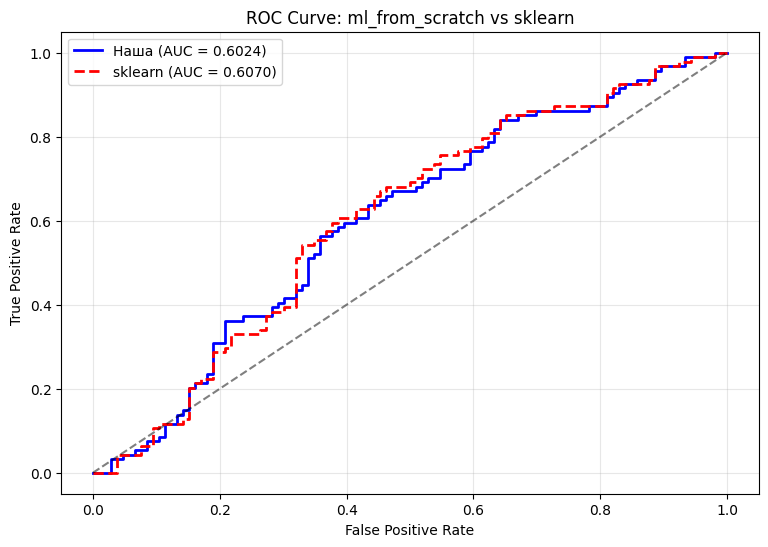

In [33]:
fpr_my, tpr_my, _ = roc_curve(y_test, y_proba_my)
fpr_sk, tpr_sk, _ = roc_curve(y_test, y_proba_sk)

plt.figure(figsize=(9, 6))
plt.plot(fpr_my, tpr_my, label=f'Наша (AUC = {my_metrics["roc_auc"]:.4f})', color='blue', lw=2)
plt.plot(fpr_sk, tpr_sk, label=f'sklearn (AUC = {sk_roc_auc:.4f})', color='red', linestyle='--', lw=2)
plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ml_from_scratch vs sklearn')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


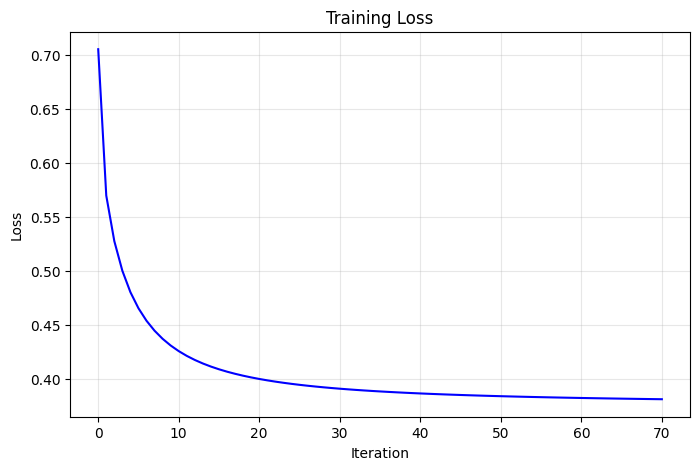


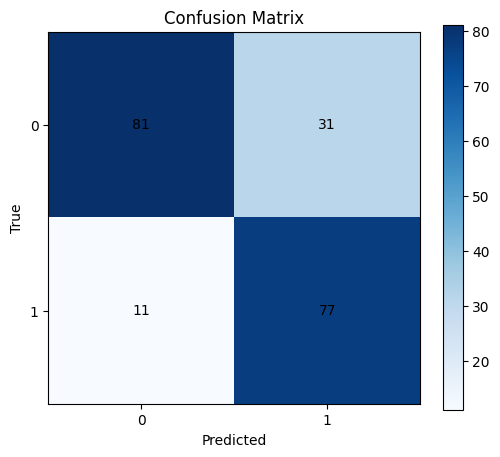


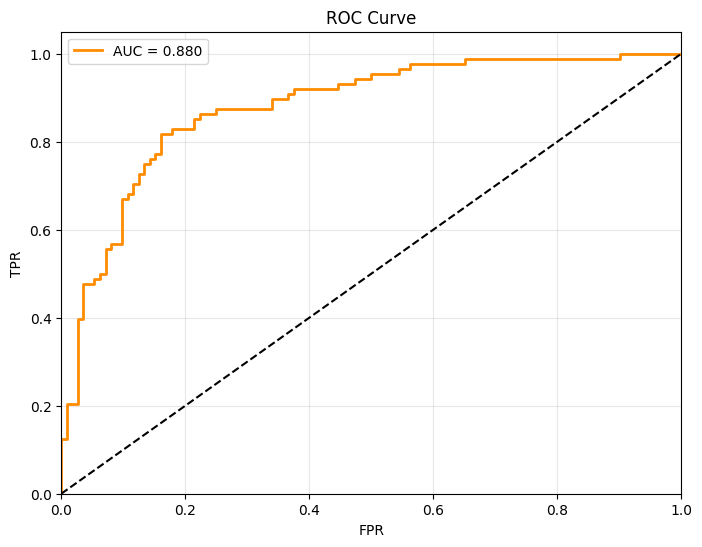

In [ ]:
metrics = my_log.get_metrics()

def show_plot(b64, title):
    return HTML(f'''
    <div style="margin: 20px 0;">
        <h3>{title}</h3>
        <img src="data:image/png;base64,{b64}" style="max-width: 600px; border: 1px solid #ccc;">
    </div>
    ''')

display(show_plot(metrics['loss_plot'], 'Training Loss'))
display(show_plot(metrics['cm_plot'], 'Confusion Matrix'))
display(show_plot(metrics['roc_plot'], 'ROC Curve'))